it should be noted that all string should be replaced with correct localisation of models and files

In [1]:
#import project
from deepEgoFace import *
from deepEgoFace.recognizer import *

#reload modules to take changes into acount
from importlib import reload
reload (utils)
reload (videoStream)
reload (workflow)
reload (detector)
reload (embedder)
reload (embeddingClassifier)
reload (faceClassifier)

#add control sequence to facevid

#save params
# SAVE_NOTHING
# SAVE_DETECTION_FRAMEBBS
# SAVE_DETECTION_CROPS
# SAVE_RECOGNIZED_FRAMEBBS
# SAVE_RECOGNIZED_CLASSES
# SAVE_RECOGNIZED_EMBEDDINGS

Using TensorFlow backend.


<module 'deepEgoFace.recognizer.faceClassifier' from '/home/preal/Documents/Eirb/proj_sem/deepEgoFace/recognizer/faceClassifier.py'>

# VISUALIZE DETECTOR ON A VIDEO

In [ ]:
#instantiate detector
det = detector.opencvBased( "./model/detector/opencv/deploy.prototxt.txt","./model/detector/opencv/res10_300x300_ssd_iter_140000.caffemodel")
#video stream from a video
stream = videoStream.opencvVideo('./corpus/N_F_P2.mp4',framePerSecondToExtract=1)
#instantiate video processor
fs = workflow.faceStream( stream,
                         "faces-tmp/", 
                         "classes.csv", 
                         det, 
                         None,
                         display=True)
#process
fs.detectFromAll()
#free memory
del fs

# PROCESS CORPUS EMBEDDINGS

In [79]:
#instantiate detector
det = detector.opencvBased( "./model/detector/opencv/deploy.prototxt.txt","./model/detector/opencv/res10_300x300_ssd_iter_140000.caffemodel")
#instantiate embedder then recognizer from it (will only give embeddings)
emb = embedder.openface("./model/recognizer/embedder/openface_nn4.small2.v1.t7")
rec = faceClassifier.embedClassify( emb, None)
#instantiate corpus processor
fv = workflow.faceVideoCorpus("./corpus/", 
                              "mp4",
                              det,
                              rec,
                              save=workflow.SAVE_RECOGNIZED_EMBEDDINGS,
                              align="model/recognizer/align/shape_predictor_68_face_landmarks.dat",
                              framePerSecondToExtract=3)
#process
fv.recognizeInAll()

1/26: JNW_FP_PL1.mp4
2/26: WJA_FP_PL2.mp4
3/26: W_F_P1.mp4
4/26: N_F_PL1.mp4
5/26: N_P_P1.mp4
6/26: J_F_P1.mp4
7/26: W_P_P1.mp4
8/26: je_P_P2.mp4
9/26: Je_P_P1.mp4
10/26: N_F_P2.mp4
11/26: Je_F_P1.mp4
12/26: N_P_P2.mp4
13/26: NW_FP_PL1.mp4
14/26: Je_F_P2.mp4
15/26: N_F_P1.mp4
16/26: JN_FP_P1.mp4
17/26: W_F_P3.mp4
18/26: W_P_P3.mp4
19/26: N_F_P3.mp4
20/26: J_F_P2.mp4
21/26: W_F_P2.mp4
22/26: WN_FP_PL1.mp4
23/26: J_P_P1.mp4
24/26: W_P_P2.mp4
25/26: JN_P_L1.mp4
26/26: JNW_FP_PL2.mp4


# PROCESS OTHER DATASET EMBEDDINGS

In [3]:
#create a stream of picture from other dataset folder
stream = videoStream.folderAsStream('./other',"jpg")
#instantiate detector
det = detector.opencvBased( "./model/detector/opencv/deploy.prototxt.txt","./model/detector/opencv/res10_300x300_ssd_iter_140000.caffemodel")
#instantiate embedder then recognizer from it (will only give embeddings)
emb = embedder.openface("./model/recognizer/embedder/openface_nn4.small2.v1.t7")
rec = faceClassifier.embedClassify( emb, None)
#instantiate corpus processor
fs = workflow.faceStream( stream,
                         "faces-tmp/other/",
                         "tmp/aligned/other-embeddings.csv",
                         det,
                         rec,
                         save=workflow.SAVE_DETECTION_CROPS, #workflow.SAVE_RECOGNIZED_EMBEDDINGS,
                         display=True) #,
                         #align="model/recognizer/align/shape_predictor_68_face_landmarks.dat")
#process
fs.recognizeFromAll()
del fs

# ASSOCIATE HAND LABELS TO EMBEDDINGS
You should manually subdive faces in folder of their class



In [81]:
utils.linkEmbeddingsAndClass( "faces", "tmp/aligned/corpus-embeddings.csv", "tmp/aligned/corpus-embeddingsClasses.csv")
labels = utils.getLabels("faces")
print(labels)
utils.mergeCorpusAndOtherEmbbedingsClasses( "tmp/aligned/corpus-embeddingsClasses.csv", labels, "tmp/aligned/other-embeddings.csv", "tmp/aligned/all-embeddingsClasses.csv")

['warren', 'nicolas', 'jeremy', 'julien', 'other']


# VISUALIZE EMBEDDINGS DIMENSION REDUCTION


Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2901...
Computing P-values for point 500 of 2901...
Computing P-values for point 1000 of 2901...
Computing P-values for point 1500 of 2901...
Computing P-values for point 2000 of 2901...
Computing P-values for point 2500 of 2901...
Mean value of sigma: 0.172671
Iteration 10: error is 24.107422
Iteration 20: error is 21.521946
Iteration 30: error is 18.617193
Iteration 40: error is 17.735359
Iteration 50: error is 17.540503
Iteration 60: error is 17.506392
Iteration 70: error is 17.474649
Iteration 80: error is 17.433383
Iteration 90: error is 17.407257
Iteration 100: error is 17.386241
Iteration 110: error is 2.636704
Iteration 120: error is 2.339445
Iteration 130: error is 2.141819
Iteration 140: error is 2.000464
Iteration 150: error is 1.893489
Iteration 160: error is 1.809806
Iteration 170: error is 1.742111
Iteration 180: error is 1.686245
Iteration 190: error is 1.639508
Iteratio

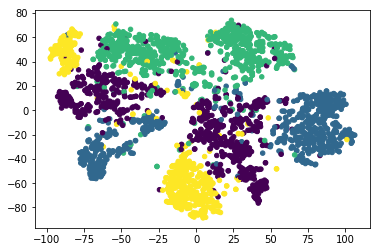

In [82]:
utils.visualizeEmbeddings("tmp/aligned/corpus-embeddingsClasses.csv",size=0.2)

# TRAIN AN EMBEDDING CLASSIFIER

In [100]:
cls = embeddingClassifier.svmBased("svm_model.sav")
cls.train("tmp/aligned/corpus-embeddingsClasses.csv")

0.9139951740779042


# TRAIN A FACE CLASSIFIER

In [ ]:
rec = faceClassifier.res18Based("./corpusOnly_res18.h5")
rec.train("./corpus/faces")

prepare data
create model
data flow from directory
Found 9717 images belonging to 4 classes.
Found 4786 images belonging to 4 classes.
train model
Epoch 1/20
37/37 [==============================] - 448s 12s/step - loss: 1.3549 - acc: 0.8498 - val_loss: 1.2109 - val_acc: 0.8839
Epoch 2/20
37/37 [==============================] - 447s 12s/step - loss: 0.9712 - acc: 0.9482 - val_loss: 0.8609 - val_acc: 0.9702
Epoch 3/20
37/37 [==============================] - 443s 12s/step - loss: 0.7911 - acc: 0.9724 - val_loss: 0.7369 - val_acc: 0.9728
Epoch 4/20
21/37 [================>.............] - ETA: 3:02 - loss: 0.7001 - acc: 0.9791

# VISUALIZE RECOGINZER ON A VIDEO

In [5]:
#instantiate detector
det = detector.opencvBased( "./model/detector/opencv/deploy.prototxt.txt","./model/detector/opencv/res10_300x300_ssd_iter_140000.caffemodel")
#instantiate embedder and get classifier then recognizer from them
#emb = embedder.openface("./model/recognizer/embedder/openface_nn4.small2.v1.t7")
#cls = embeddingClassifier.svmBased("./model/recognizer/embedding-classifier/aligned_corpOnly_embedding_svm_model.sav")
#rec = faceClassifier.embedClassify( emb, cls)
#instantiate face classifier
rec = faceClassifier.kerasCnn("./model/recognizer/face-classifier/test_res18.h5")
labels = utils.getLabels("corpus/faces")
#keras cnn has label in alphabetic order
labels = sorted(labels)
del labels[3]
print(labels)
stream = videoStream.opencvVideo('./corpus/W_F_P1.mp4',framePerSecondToExtract=1)
fs = workflow.faceStream( stream,
                         "faces-tmp/", 
                         "labels.csv", 
                         det, 
                         rec, 
                         display=True,
                         labels=labels)#,
                         #align="model/recognizer/align/shape_predictor_68_face_landmarks.dat")
fs.recognizeFromAll()
del fs

['jeremy', 'julien', 'nicolas', 'warren']
[[1. 0. 0. 0.]]
0
[[1. 0. 0. 0.]]
0
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2
[[0. 0. 1. 0.]]
2


KeyboardInterrupt: 

# LOG TIME

In [ ]:

logger = utils.logger("./log/all.log")

#instantiate detector
det = detector.opencvBased( "./model/detector/opencv/deploy.prototxt.txt","./model/detector/opencv/res10_300x300_ssd_iter_140000.caffemodel")
#instantiate embedder and get classifier then recognizer from them
#emb = embedder.openface("./model/recognizer/embedder/openface_nn4.small2.v1.t7")
#cls = embeddingClassifier.svmBased("./model/recognizer/embedding-classifier/aligned_corpOnly_embedding_svm_model.sav")
#rec = faceClassifier.embedClassify( emb, cls)
#instantiate face classifier
rec = faceClassifier.res18Based()
stream = videoStream.opencvVideo('./corpus/N_F_P2.mp4',framePerSecondToExtract=1)
fs = workflow.faceStream( stream,
                         "faces-tmp/", 
                         "labels.csv", 
                         det, 
                         rec, 
                         display=True,
                         labels=labels,
                         align="model/recognizer/align/shape_predictor_68_face_landmarks.dat")
fs.recognizeFromAll(timeLogger=logger)
del fs